In [1]:
pip install numpy pandas scikit-learn matplotlib seaborn yfinance tensorflow


In [20]:
import yfinance as yf

# Download the stock price data (AAPL stock for 5 years)
data = yf.download('AAPL', start='2019-01-01', end='2024-01-01')
print(data.head())


[*********************100%***********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2019-01-02  38.722500  39.712502  38.557499  39.480000  37.750088  148158800
2019-01-03  35.994999  36.430000  35.500000  35.547501  33.989899  365248800
2019-01-04  36.132500  37.137501  35.950001  37.064999  35.440895  234428400
2019-01-07  37.174999  37.207500  36.474998  36.982498  35.362015  219111200
2019-01-08  37.389999  37.955002  37.130001  37.687500  36.036129  164101200


In [21]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,37.750088,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,33.989899,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.440895,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.362015,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.036129,164101200


In [22]:
data['Price Range'] = data['High'] - data['Low']


In [23]:

data['MA50'] = data['Adj Close'].rolling(window=50).mean()

data['MA200'] = data['Adj Close'].rolling(window=200).mean()

In [24]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Price Range,MA50,MA200
Date,,,,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,37.750088,148158800,1.155003,NaN,NaN
2019-01-03,35.994999,36.430000,35.500000,35.547501,33.989899,365248800,0.930000,NaN,NaN
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.440895,234428400,1.187500,NaN,NaN
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.362015,219111200,0.732502,NaN,NaN
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.036129,164101200,0.825001,NaN,NaN


In [25]:
data = data.dropna(subset=['MA50', 'MA200'])


,Open,High,Low,Close,Adj Close,Volume,Price Range,MA50,MA200
Date,,,,,,,,,
2019-10-16,58.342499,58.810001,58.299999,58.592499,56.696682,73903200,0.510002,52.283676,46.649350
2019-10-17,58.772499,59.037498,58.380001,58.820000,56.916821,67585200,0.657497,52.462658,46.745184
2019-10-18,58.647499,59.395000,58.572498,59.102501,57.190170,97433600,0.822502,52.625947,46.861185
2019-10-21,59.380001,60.247501,59.330002,60.127499,58.182018,87247200,0.917500,52.817154,46.974891
2019-10-22,60.290001,60.549999,59.904999,59.990002,58.048969,82293600,0.645000,53.008167,47.088326
...,...,...,...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,192.868149,37122800,2.440002,184.605996,177.602992
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.320221,28919300,1.059998,184.893611,177.827888
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.419830,48087700,2.410004,185.185805,178.043510


In [26]:
data.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
Price Range,0
MA50,0
MA200,0


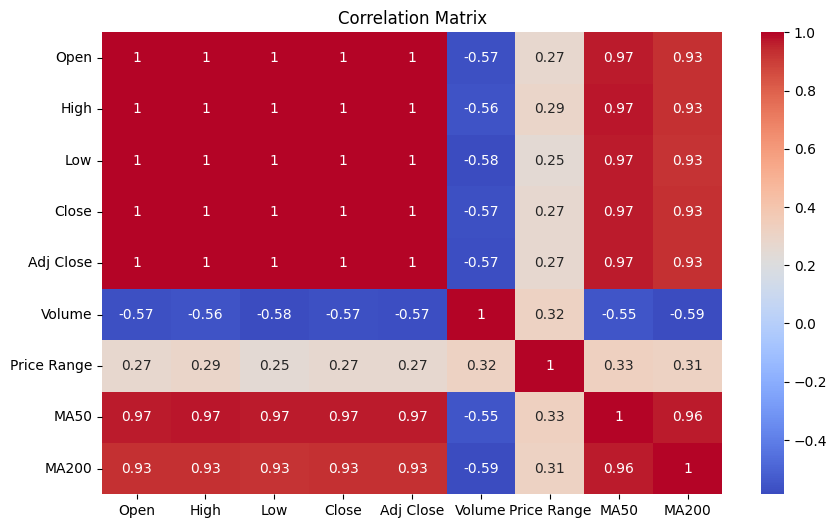

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


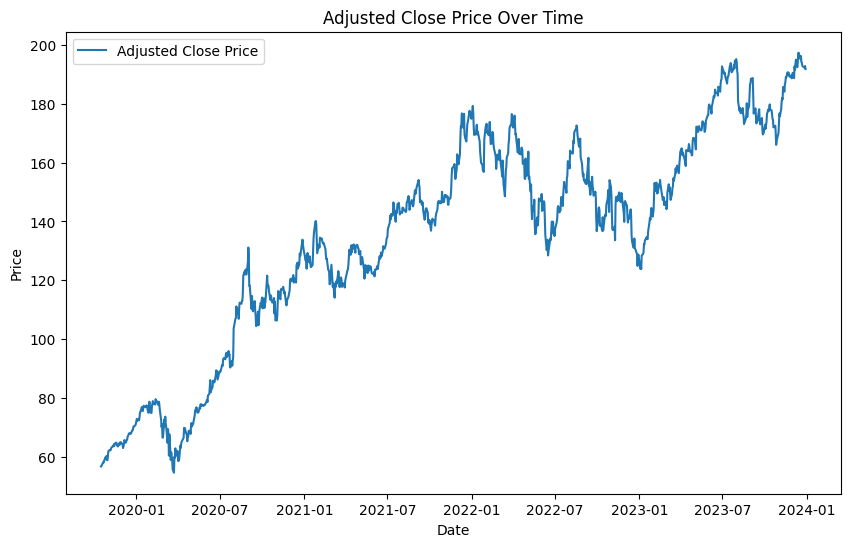

In [28]:

plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Adj Close'], label='Adjusted Close Price')
plt.title('Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

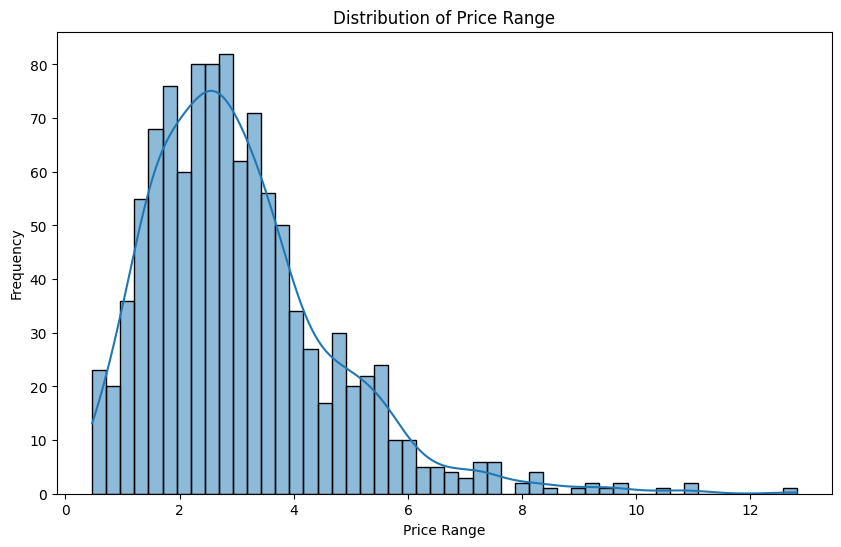

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Price Range'], bins=50, kde=True)
plt.title('Distribution of Price Range')
plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.show()


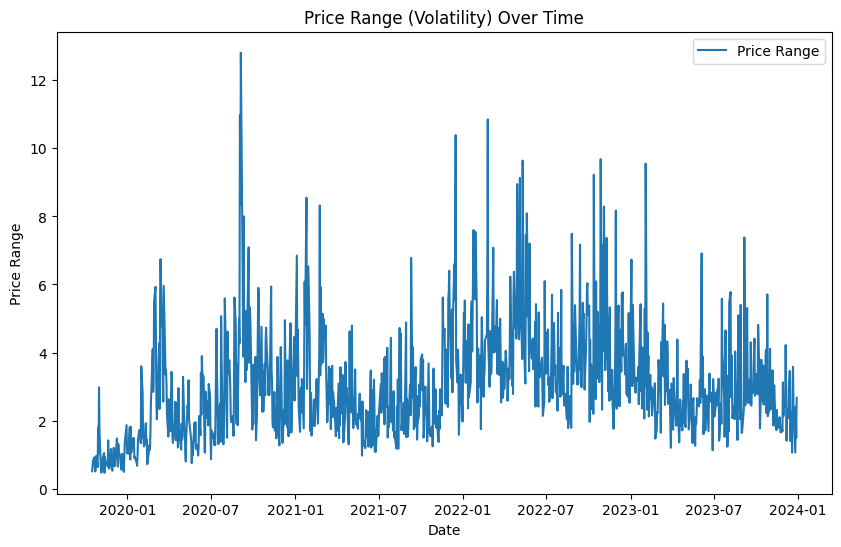

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Price Range'], label='Price Range')
plt.title('Price Range (Volatility) Over Time')
plt.xlabel('Date')
plt.ylabel('Price Range')
plt.legend()
plt.show()


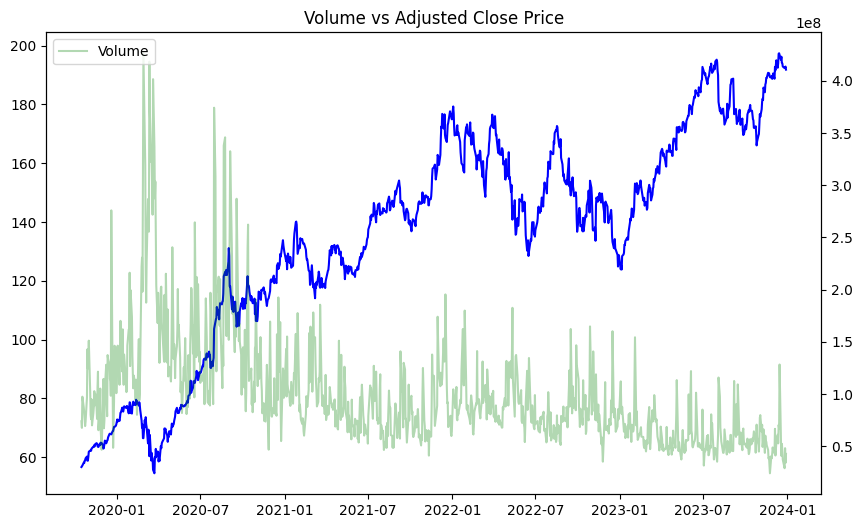

In [31]:

plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Adj Close'], label='Adjusted Close', color='b')
plt.twinx()
plt.plot(data.index, data['Volume'], label='Volume', color='g', alpha=0.3)
plt.title('Volume vs Adjusted Close Price')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.show()


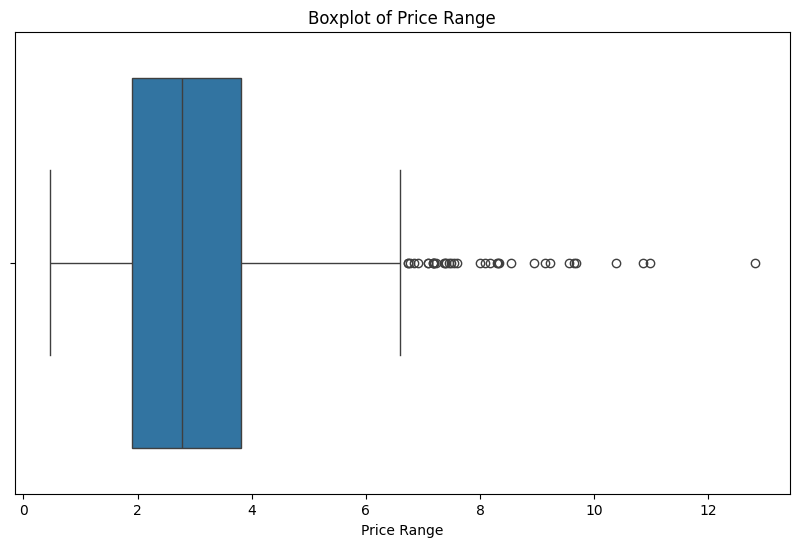

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Price Range'])
plt.title('Boxplot of Price Range')
plt.show()


In [34]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Price Range,MA50,MA200
Date,,,,,,,,,
2019-10-16,58.342499,58.810001,58.299999,58.592499,56.696682,73903200,1.038251,52.283676,46.649350
2019-10-17,58.772499,59.037498,58.380001,58.820000,56.916821,67585200,1.038251,52.462658,46.745184
2019-10-18,58.647499,59.395000,58.572498,59.102501,57.190170,97433600,1.038251,52.625947,46.861185
2019-10-21,59.380001,60.247501,59.330002,60.127499,58.182018,87247200,1.038251,52.817154,46.974891
2019-10-22,60.290001,60.549999,59.904999,59.990002,58.048969,82293600,1.038251,53.008167,47.088326


In [35]:
# Clipping extreme values to the 95th percentile
data['Price Range'] = data['Price Range'].clip(lower=data['Price Range'].quantile(0.05),
                                               upper=data['Price Range'].quantile(0.95))


<ipython-input-35-62ce6b99e021>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price Range'] = data['Price Range'].clip(lower=data['Price Range'].quantile(0.05),


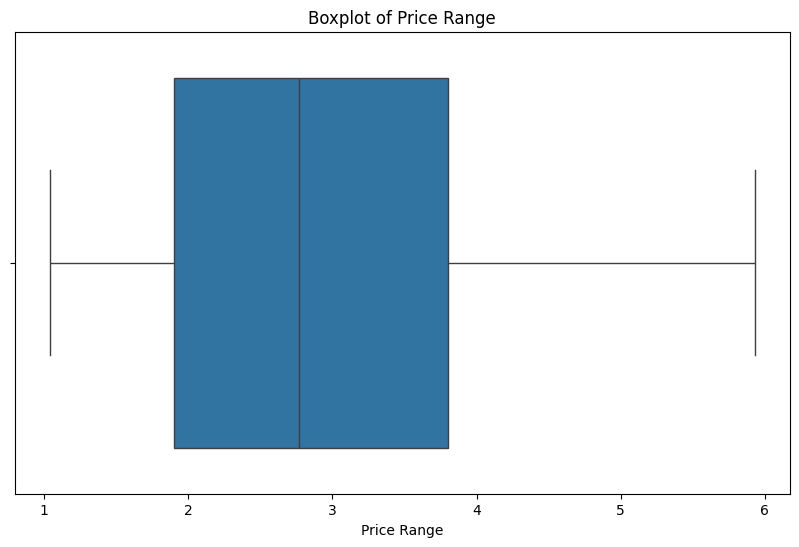

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Price Range'])
plt.title('Boxplot of Price Range')
plt.show()


In [37]:
data.corr()

,Open,High,Low,Close,Adj Close,Volume,Price Range,MA50,MA200
Open,1.000000,0.999341,0.999209,0.998314,0.998199,-0.570640,0.288559,0.968100,0.926429
High,0.999341,1.000000,0.999066,0.999196,0.999042,-0.561447,0.306302,0.969412,0.928451
Low,0.999209,0.999066,1.000000,0.999248,0.999190,-0.582505,0.266672,0.966497,0.925613
Close,0.998314,0.999196,0.999248,1.000000,0.999885,-0.572669,0.284633,0.967465,0.927036
Adj Close,0.998199,0.999042,0.999190,0.999885,1.000000,-0.574815,0.282565,0.968506,0.929586
Volume,-0.570640,-0.561447,-0.582505,-0.572669,-0.574815,1.000000,0.302334,-0.551432,-0.586525
Price Range,0.288559,0.306302,0.266672,0.284633,0.282565,0.302334,1.000000,0.349551,0.338115
MA50,0.968100,0.969412,0.966497,0.967465,0.968506,-0.551432,0.349551,1.000000,0.963741
MA200,0.926429,0.928451,0.925613,0.927036,0.929586,-0.586525,0.338115,0.963741,1.000000


In [53]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Initialize the MinMaxScaler for features
scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the features (X), here ['Price Range', 'MA50', 'MA200']
X_scaled = scaler.fit_transform(data[['Price Range', 'MA50', 'MA200']])

# Convert scaled features to a DataFrame for clarity (optional)
X_scaled = pd.DataFrame(X_scaled, columns=['Price Range', 'MA50', 'MA200'])


In [54]:
# Initialize a new MinMaxScaler for the target variable
y_scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the target variable (y), here 'Adj Close'
y_scaled = y_scaler.fit_transform(data[['Adj Close']])


In [134]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)



In [135]:
import numpy as np

# Reshape the data to 3D for LSTM [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [136]:

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [148]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Initialize the LSTM model
model = Sequential()

# Adding the first LSTM layer and Dropout regularization
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and Dropout regularization
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(1))  # Output layer predicting a single value (Adj Close)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')




/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Sequential(): Initializes a sequential model, which means layers are added one after the other.
LSTM(units=50): Adds an LSTM layer with 50 units (neurons). This is the memory unit that will capture patterns in the time series. The return_sequences=True allows the LSTM layer to return the entire sequence of output for the next LSTM layer.
Dropout(0.2): This adds dropout regularization to prevent overfitting. 0.2 means that 20% of the neurons are randomly dropped during training.
Dense(1): This adds a fully connected output layer with 1 unit, as we are predicting the adjusted close price (a single value).
model.compile(): Compiles the model with the Adam optimizer and the Mean Squared Error (MSE) loss function, which is commonly used for regression tasks.


In [150]:
from tensorflow.keras.optimizers import Adam

# Compile the model with Adam optimizer and learning rate of 0.01
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')





In [151]:
# Train the model without early stopping
history = model.fit(X_train, y_train, epochs=200, batch_size=16, validation_split=0.2)




Epoch 1/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1758 - val_loss: 0.0134
Epoch 2/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0263 - val_loss: 0.0156
Epoch 3/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0211 - val_loss: 0.0168
Epoch 4/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0199 - val_loss: 0.0138
Epoch 5/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0154 - val_loss: 0.0118
Epoch 6/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0136 - val_loss: 0.0101
Epoch 7/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - val_loss: 0.0120
Epoch 8/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - val_loss: 0.0069
Epoch 9/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - val_loss: 0.0105
Epoch 10/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - val_loss: 0.0114
Epoch 11/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0084 - val_loss: 0.0089
Epoch 12/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.

In [152]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Inverse transform the predictions back to the original scale
predictions = y_scaler.inverse_transform(predictions)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


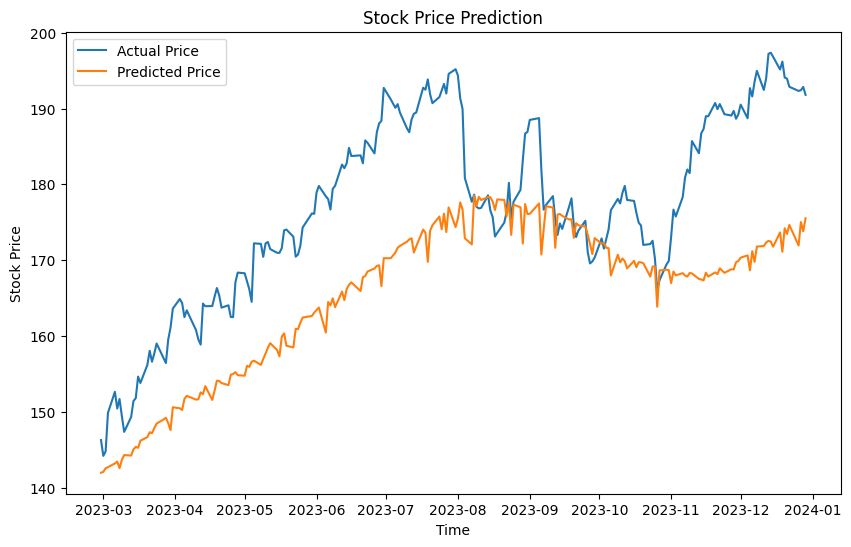

In [153]:
import matplotlib.pyplot as plt

# Plot the predicted and actual values
plt.figure(figsize=(10, 6))
plt.plot(data.index[len(data) - len(y_test):], y_scaler.inverse_transform(y_test), label='Actual Price')
plt.plot(data.index[len(data) - len(predictions):], predictions, label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [154]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_scaler.inverse_transform(y_test), predictions))
print('Root Mean Squared Error:', rmse)


Root Mean Squared Error: 13.453921119861656


In [112]:
percentage_error = (rmse / y_test.mean()) * 100
print(f"Percentage RMSE: {percentage_error}%")


Percentage RMSE: 1279.002500842226%
